In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
df.shape

(400, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.drop('id',axis = 1 , inplace = True)

In [10]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [12]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [13]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [14]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [16]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [17]:
#due to string values in the column it is an object column.

In [22]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce') #coerce means suppress or ignore

In [23]:
df['packed_cell_volume'].dtype

dtype('float64')

In [25]:
df['packed_cell_volume'].unique()

#Here all the strings are coverted to nan value so data type became float.

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [26]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [27]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors = 'coerce')

In [28]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'] , errors = 'coerce')

In [29]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [33]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [34]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [36]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values")

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary_artery_disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
peda_edema has ['no' 'yes' nan] values
aanemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


In [38]:
df['diabetes_mellitus'].replace(to_replace = {' yes':'yes','\tyes':'yes','\tno':'no'},inplace = True)

In [39]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [40]:
df['coronary_artery_disease'].replace(to_replace = {'\tno': 'no'},inplace = True)

In [41]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [43]:
df['class'].replace(to_replace = {'ckd\t':'ckd'},inplace = True)

In [44]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [45]:
df['class'] = df['class'].map({'ckd':1 , 'notckd':0})

In [46]:
df['class'].unique()

array([1, 0], dtype=int64)

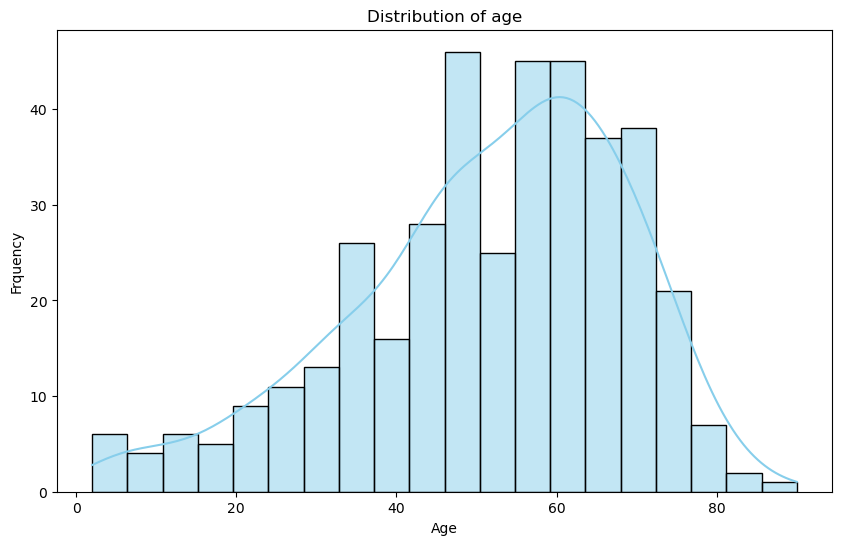

In [49]:
#univariate analysis

plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna() , kde = True , bins = 20 , color = 'skyblue')
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frquency")
plt.show()

In [50]:
#insights >> Age is left skewed data.

In [51]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

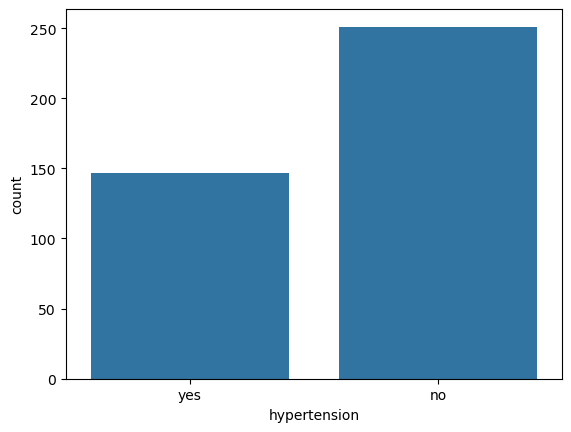

In [52]:
sns.countplot(x = 'hypertension' , data = df )

In [53]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='blood_urea'>

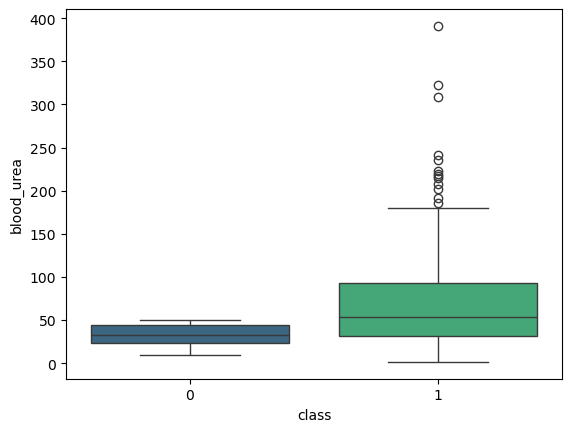

In [55]:
sns.boxplot(x = 'class' , y = 'blood_urea' , data = df , palette = 'viridis')

In [56]:
#insights >> people with disease have higher blood urea than normal people.

<Axes: xlabel='class', ylabel='serum_creatinine'>

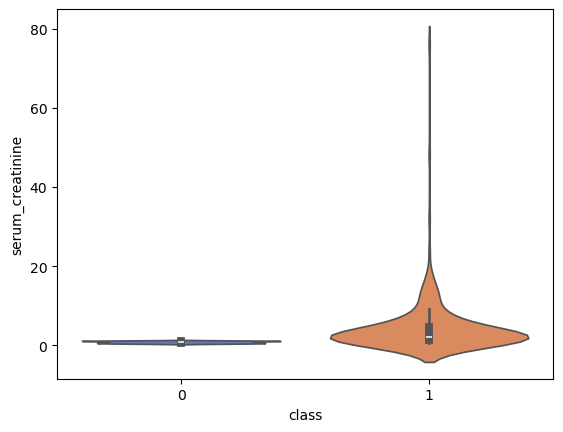

In [57]:
sns.violinplot(x = 'class' , y = 'serum_creatinine' , data = df , palette = 'muted')

In [58]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

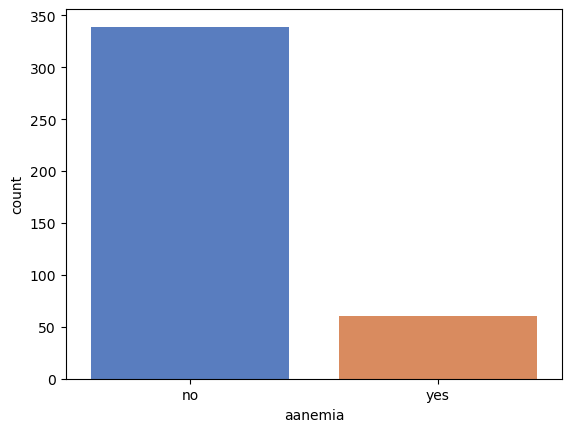

In [59]:
sns.countplot(x  = 'aanemia' , data = df , palette = 'muted')

In [60]:
#majority of people are not suffering from aanemia.

In [61]:
df['appetite']

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appetite, Length: 400, dtype: object

<Axes: ylabel='count'>

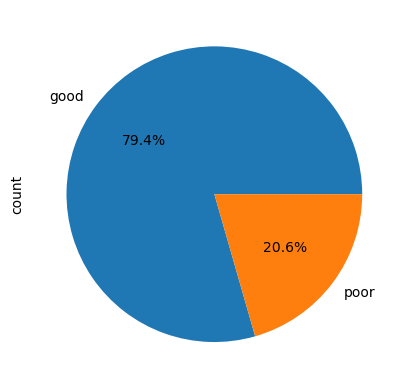

In [62]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='count'>

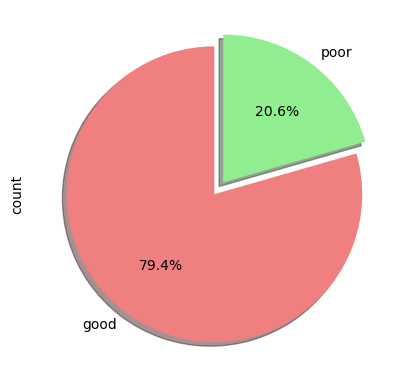

In [64]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%' , colors = ["lightcoral" , "lightgreen"], explode = (0,0.1) ,shadow = True , startangle = 90 )

In [65]:
df['pus_cell_clumps']

0      notpresent
1      notpresent
2      notpresent
3         present
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: pus_cell_clumps, Length: 400, dtype: object

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

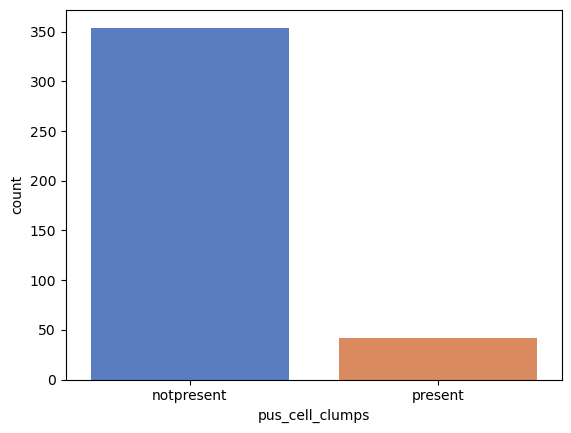

In [66]:
sns.countplot(x = 'pus_cell_clumps' , data = df , palette = 'muted')

In [67]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

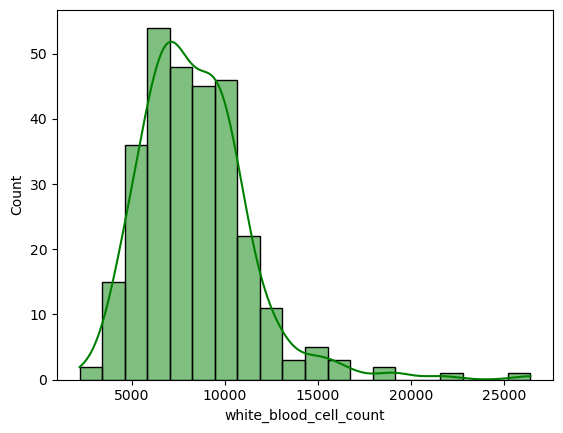

In [70]:
sns.histplot(df['white_blood_cell_count'].dropna() , kde = True , color = 'green' , bins = 20)

In [71]:
#doughnut plot / ring chart 
# >> pie chart with a hole in the center

<Axes: ylabel='count'>

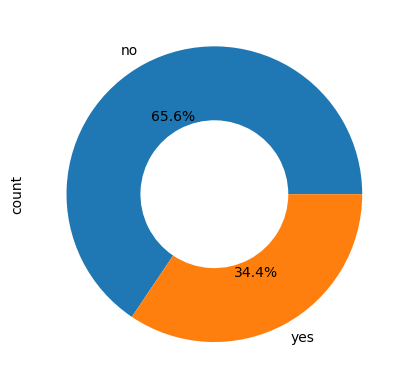

In [77]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = '%1.1f%%' , wedgeprops = dict(width = 0.5))

In [78]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

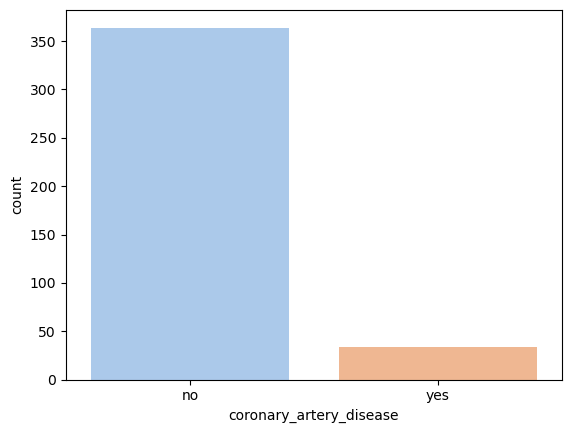

In [79]:
sns.countplot(x = 'coronary_artery_disease' , data = df , palette = 'pastel')

In [80]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='peda_edema', ylabel='count'>

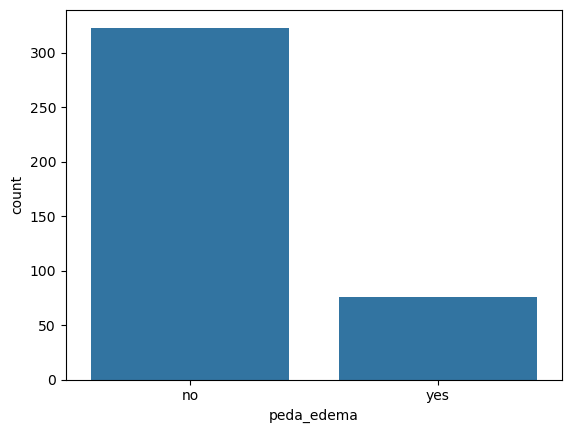

In [81]:
sns.countplot(x = 'peda_edema' , data = df )

<Axes: xlabel='bacteria', ylabel='count'>

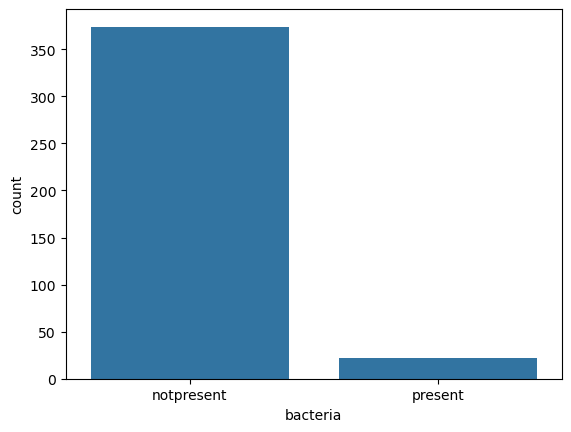

In [82]:
sns.countplot(x = 'bacteria' , data = df)

In [83]:
#bivariate analysis

<Axes: xlabel='age', ylabel='blood_pressure'>

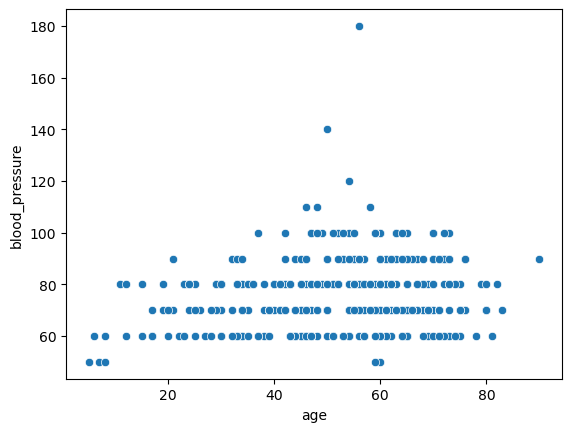

In [85]:
sns.scatterplot(x = 'age' , y = 'blood_pressure' , data = df)

<Axes: xlabel='age', ylabel='blood_pressure'>

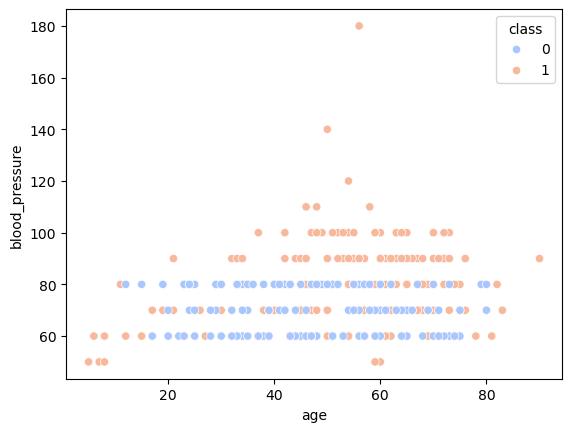

In [86]:
sns.scatterplot(x = 'age' , y = 'blood_pressure' , data = df , hue = 'class' , palette = 'coolwarm')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

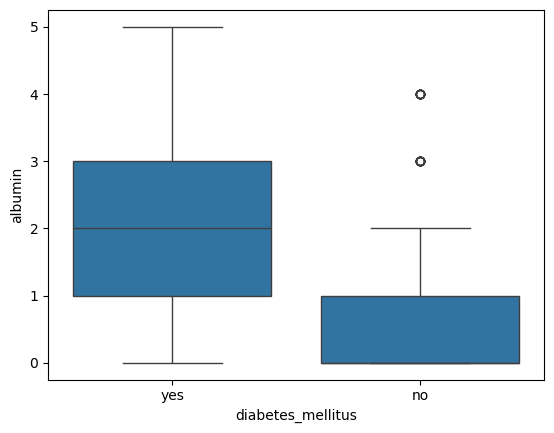

In [87]:
sns.boxplot(x = 'diabetes_mellitus' , y = 'albumin' , data = df)

In [88]:
#stacked bar chart >> diabetes_millletus and hyertension
pd.crosstab(df['diabetes_mellitus'] , df['hypertension']) # summarize data


hypertension        no  yes
diabetes_mellitus          
no                 220   41
yes                 31  106

<Axes: xlabel='diabetes_mellitus'>

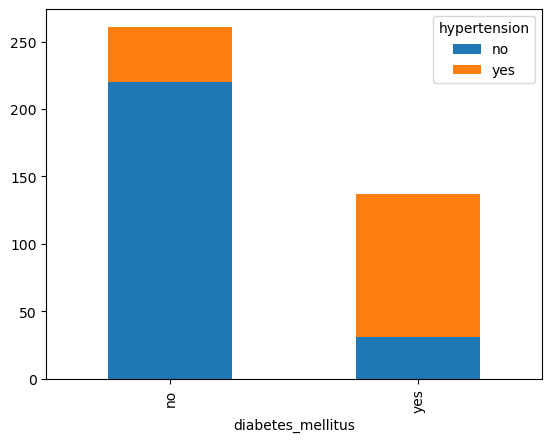

In [89]:
a = pd.crosstab(df['diabetes_mellitus'] , df['hypertension']) 
a.plot(kind = 'bar' , stacked = True)

In [90]:
#multivariate analysis

cols = ['age' , 'blood_pressure', 'blood_glucose_random' , 'serum_creatinine' , 'class']
df[cols]

age  blood_pressure  blood_glucose_random  serum_creatinine  class
0    48.0            80.0                 121.0               1.2      1
1     7.0            50.0                   NaN               0.8      1
2    62.0            80.0                 423.0               1.8      1
3    48.0            70.0                 117.0               3.8      1
4    51.0            80.0                 106.0               1.4      1
..    ...             ...                   ...               ...    ...
395  55.0            80.0                 140.0               0.5      0
396  42.0            70.0                  75.0               1.2      0
397  12.0            80.0                 100.0               0.6      0
398  17.0            60.0                 114.0               1.0      0
399  58.0            80.0                 131.0               1.1      0

[400 rows x 5 columns]

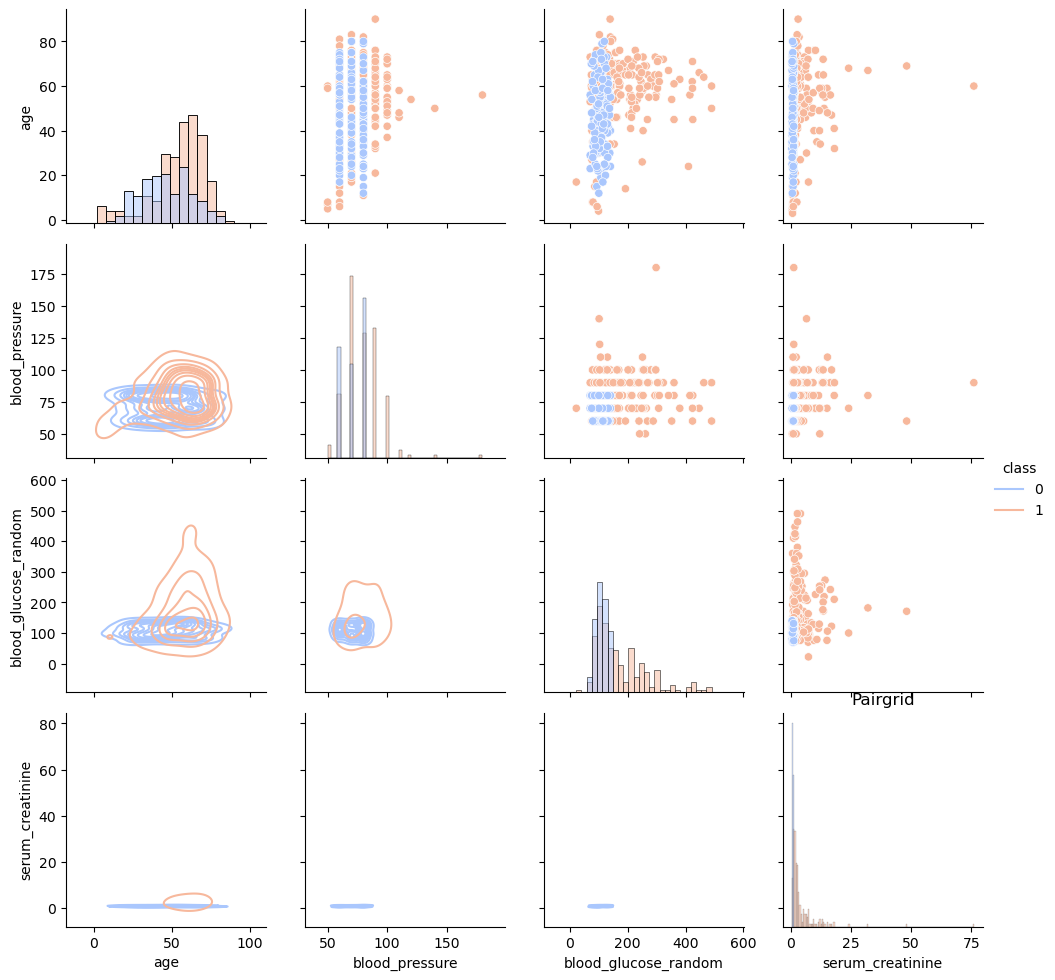

In [99]:
#customized pair plots

g = sns.PairGrid(df[cols] , hue = 'class' , palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot , cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("Pairgrid")
plt.show()

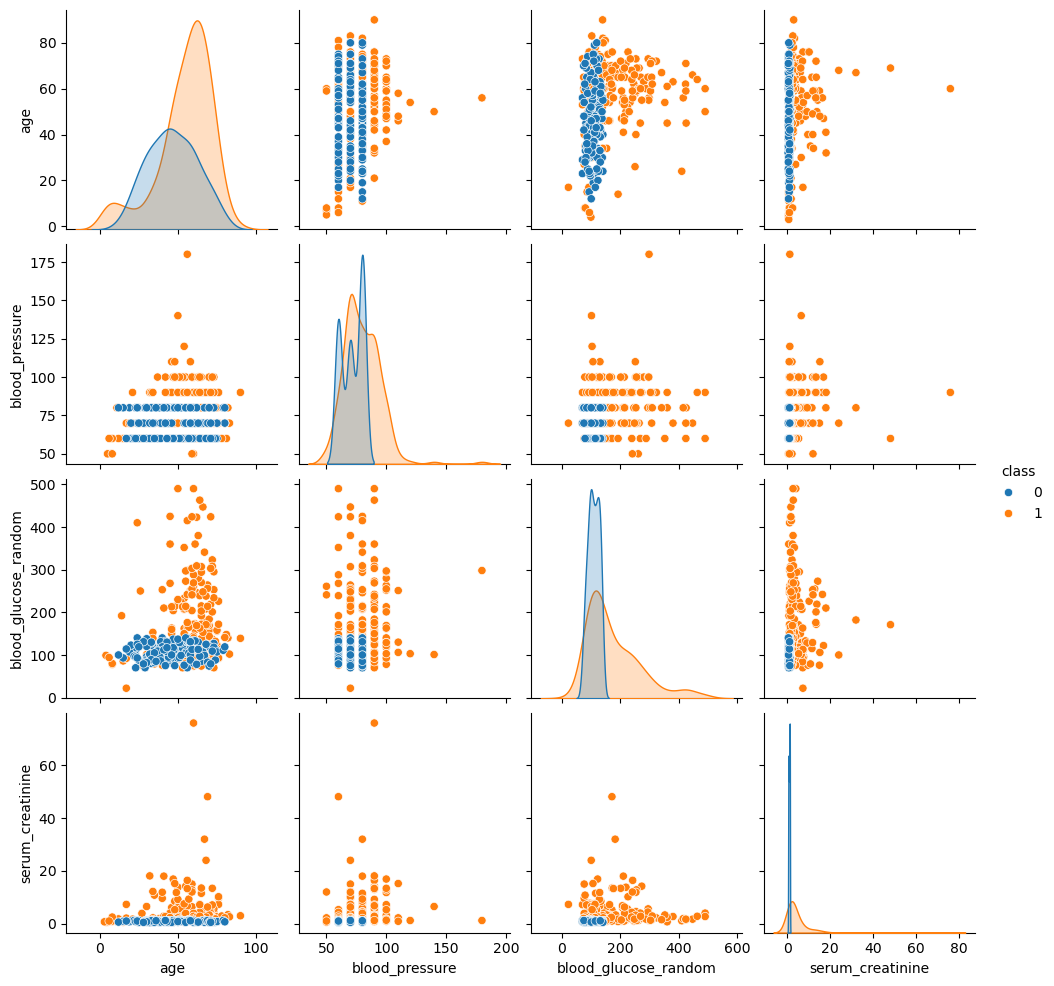

In [96]:
sns.pairplot(df[cols], hue= 'class')

In [101]:
corr = df.corr(numeric_only = True)

<Axes: >

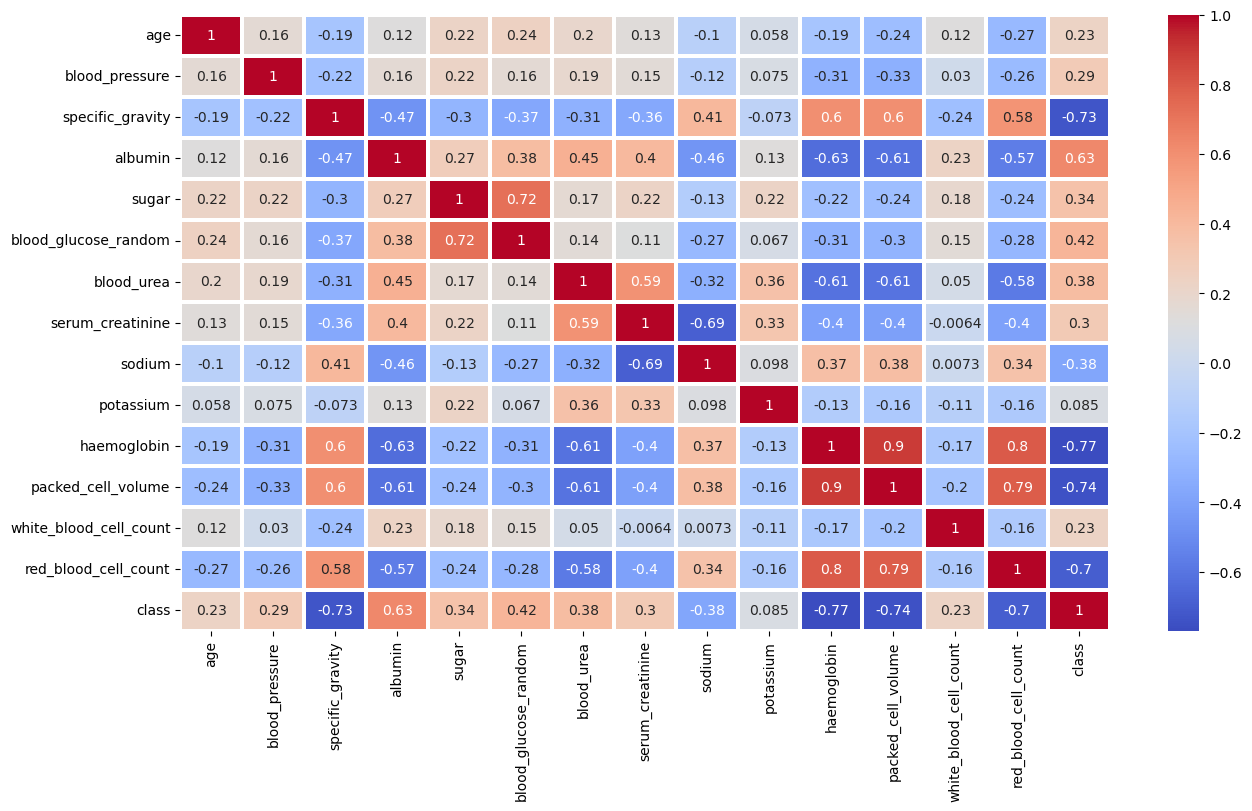

In [102]:
plt.figure(figsize = (15,8))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , linewidth = 1.5)

In [103]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

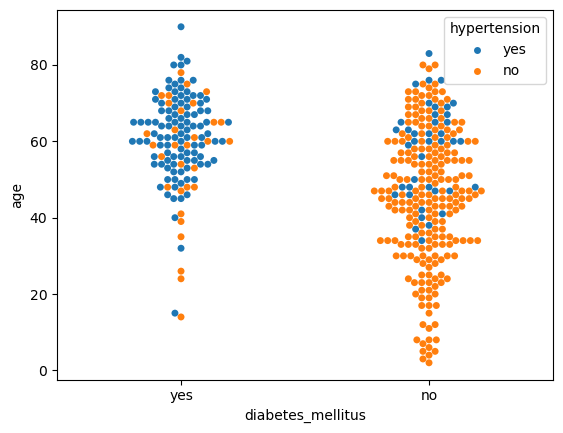

In [104]:
sns.swarmplot(x = 'diabetes_mellitus' , y = 'age' , hue = 'hypertension' , data = df )

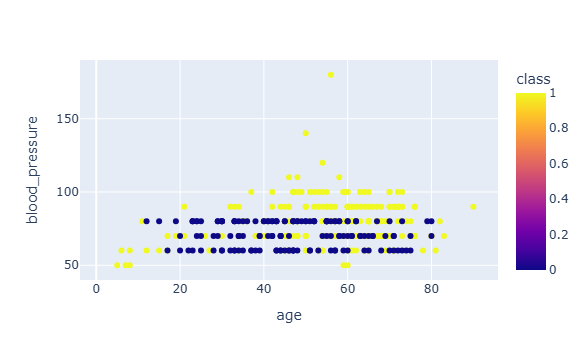

In [106]:
fig = px.scatter(df , x = 'age' , y = 'blood_pressure' , color = 'class')
fig.show()

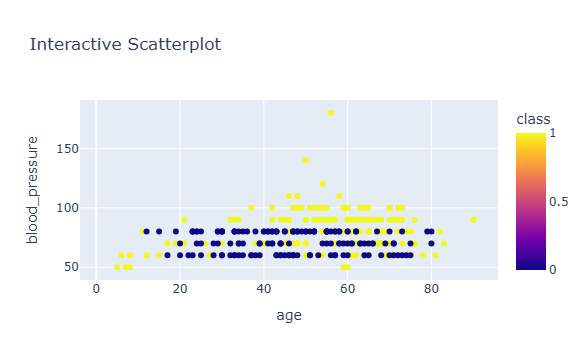

In [108]:
fig = px.scatter(df , x = 'age' , y = 'blood_pressure' , color = 'class', hover_data = ['serum_creatinine','haemoglobin'] , title = 'Interactive Scatterplot')
fig.show()

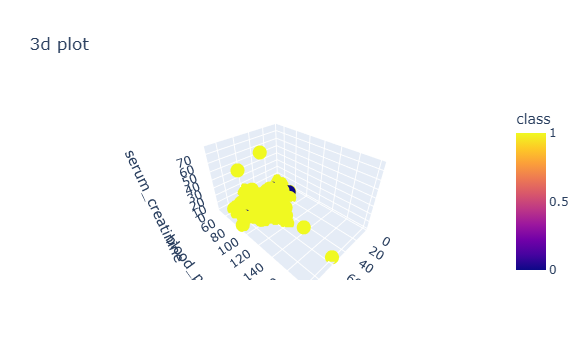

In [109]:
px.scatter_3d(df , x = 'age' , y = 'blood_pressure' , z = 'serum_creatinine', color = 'class' , title = '3d plot')

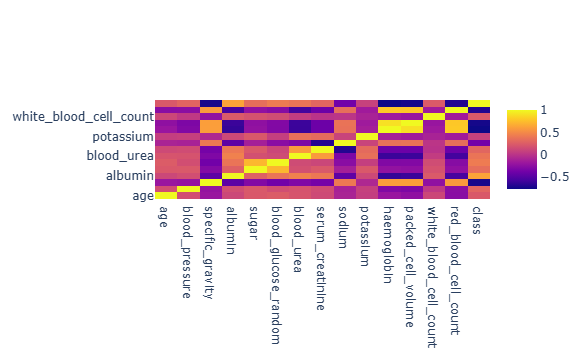

In [111]:
import plotly.graph_objects as go
go.Figure(data = go.Heatmap(z = corr.values, x = corr.columns , y = corr.index))

In [115]:
m = df[num_cols].median()

In [122]:
df[num_cols] = df[num_cols].fillna(m)

In [123]:
df[num_cols].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [132]:
mo = df[cat_cols].mode().iloc[0]

In [133]:
df[cat_cols] = df[cat_cols].fillna(mo)

In [134]:
df[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [135]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [136]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in cat_cols:
    df[col] = label.fit_transform(df[col])

In [137]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                 121.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   peda_edema  aanemia  class  
0           0        0      1  
1           0        0      1  
2           0        1      1  
3           1        1      1  
4           0        0      1  

[5 rows x 25 columns]

In [138]:
df.cdtypes

AttributeError: 'DataFrame' object has no attribute 'cdtypes'

In [139]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetes_mellitus            int32
coronary_artery_disease      int32
appetite                     int32
peda_edema                   int32
aanemia                      int32
class                        int64
dtype: object